In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats
import math
import sklearn

In [333]:
vk = pd.read_csv("VK.csv")


In [334]:
vk = vk.drop(vk[vk.Score == "DNB"].index)
vk = vk.drop(vk[vk.Score == "TDNB"].index)
vk = vk.drop(vk[vk.Start == "NaN"].index)
vk['Score'] = vk['Score'].str.replace(r"[\*]",'')

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\1863469616.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  vk['Score'] = vk['Score'].str.replace(r"[\*]",'')


In [335]:
af = pd.read_csv("AF_new.csv")


In [336]:
af

,R,mins,bf,4s,6s,Strike rate,p,Mode of dissmisal,Alive,Start,Opposition,Venue,Date,Match no.
0,15*,21,14,1,0,107.14,5,not out,1,1,v England,Adelaide,40555,T20I # 197
1,53*,35,33,4,2,160.60,6,not out,1,1,v England,Melbourne,40557,T20I # 198
2,36,33,23,6,0,156.52,2,run out,0,1,v India,Melbourne,40942,T20I # 218
3,1,8,3,0,0,33.33,2,caught,0,1,v Sri Lanka,Sydney,41300,T20I # 299
4,7,17,6,1,0,116.66,1,lbw,0,2,v Sri Lanka,Melbourne,41302,T20I # 300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8,14,12,0,0,66.66,1,caught,0,1,v Sri Lanka,Melbourne,44612,T20I # 1478
88,55,84,45,6,0,122.22,2,caught,0,2,v Pakistan,Lahore,44656,T20I # 1504
89,61*,76,40,4,4,152.50,1,not out,1,2,v Sri Lanka,Colombo (RPS),44719,T20I # 1551
90,24,16,13,4,0,184.61,1,caught,0,2,v Sri Lanka,Colombo (RPS),44720,T20I # 1552


In [337]:
af = af.drop(af[af.R == "DNB"].index)
af = af.drop(af[af.R == "TDNB"].index)
af = af.drop(af[af.R == "NaN"].index)
af['R'] = af['R'].str.replace(r"[\*]",'')

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\449556801.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  af['R'] = af['R'].str.replace(r"[\*]",'')


In [338]:
ba = pd.read_csv("BA.csv")


In [339]:
ba = ba.drop(ba[ba.Score == "DNB"].index)
ba = ba.drop(ba[ba.Score == "TDNB"].index)
ba = ba.drop(ba[ba.Inn == "NaN"].index)
ba['Score'] = ba['Score'].str.replace(r"[\*]",'')

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\4025628725.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ba['Score'] = ba['Score'].str.replace(r"[\*]",'')


In [340]:
dc = pd.read_csv("DC.csv")


In [341]:
dc = dc.iloc[:68]
dc = dc.drop(dc[dc.Score == "DNB"].index)
dc = dc.drop(dc[dc.Score == "TDNB"].index)
dc = dc.drop(dc[dc.Start == "NaN"].index)
dc['Score'] = dc['Score'].str.replace(r"[\*]",'')


C:\Users\levas\AppData\Local\Temp\ipykernel_19412\1776129273.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dc['Score'] = dc['Score'].str.replace(r"[\*]",'')


In [342]:
jb = pd.read_csv("JB.csv")


In [343]:
jb = jb.drop(jb[jb.Score == "DNB"].index)
jb = jb.drop(jb[jb.Score == "TDNB"].index)
jb = jb.drop(jb[jb.Start == "NaN"].index)
jb['Score'] = jb['Score'].str.replace(r"[\*]",'')
# jb

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\4165948907.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  jb['Score'] = jb['Score'].str.replace(r"[\*]",'')


In [344]:
kw = pd.read_csv("KW.csv")

In [345]:
kw = kw.iloc[:74]
kw = kw.drop(kw[kw.Score == "DNB"].index)
kw = kw.drop(kw[kw.Score == "TDNB"].index)
kw = kw.drop(kw[kw.Start == "NaN"].index)
kw['Score'] = kw['Score'].str.replace(r"[\*]",'')
# kw

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\2476273272.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  kw['Score'] = kw['Score'].str.replace(r"[\*]",'')


In [346]:
nicp = pd.read_csv("NP.csv")


In [347]:
nicp = nicp.drop(nicp[nicp.Score == "DNB"].index)
nicp = nicp.drop(nicp[nicp.Score == "TDNB"].index)
nicp = nicp.drop(nicp[nicp.Start == "NaN"].index)
nicp['Score'] = nicp['Score'].str.replace(r"[\*]",'')
# nicp

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\1291672583.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  nicp['Score'] = nicp['Score'].str.replace(r"[\*]",'')


In [348]:
qdk = pd.read_csv("QDK.csv")


In [349]:
qdk = qdk.drop(qdk[qdk.Score == "DNB"].index)
qdk = qdk.drop(qdk[qdk.Score == "TDNB"].index)
qdk = qdk.drop(qdk[qdk.Start == "NaN"].index)
qdk['Score'] = qdk['Score'].str.replace(r"[\*]",'')
# qdk

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\280942862.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  qdk['Score'] = qdk['Score'].str.replace(r"[\*]",'')


In [350]:
sah = pd.read_csv("SAh.csv")



In [351]:
sah = sah.drop(sah[sah.Score == "DNB"].index)
sah = sah.drop(sah[sah.Score == "TDNB"].index)
sah = sah.drop(sah[sah.Start == "NaN"].index)
sah['Score'] = sah['Score'].str.replace(r"[\*]",'')

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\4162095342.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sah['Score'] = sah['Score'].str.replace(r"[\*]",'')


In [352]:
mn = pd.read_csv("MN.csv")

In [353]:
mn = mn.drop(mn[mn.Runs == "DNB"].index)
mn = mn.drop(mn[mn.Runs == "TDNB"].index)
mn = mn.drop(mn[mn.Inns == "NaN"].index)
mn['Runs'] = mn['Runs'].str.replace(r"[\*]",'')
# qdk

C:\Users\levas\AppData\Local\Temp\ipykernel_19412\3933266722.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  mn['Runs'] = mn['Runs'].str.replace(r"[\*]",'')


In [354]:
mn

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Alive,Opposition,Ground,Start Date,Match no
0,2,6,5,0,0,40,7,caught,1,0,v Ireland,Colombo (PSS),1-Feb-10,T20I # 128
1,23,15,12,3,0,191.66,6,caught,2,1,v Canada,Colombo (SSC),4-Feb-10,T20I # 132
2,43,31,25,3,2,172,6,not out,1,1,v Ireland,Dubai (DSC),9-Feb-10,T20I # 135
3,0,3,1,0,0,0,6,caught,1,1,v Scotland,Abu Dhabi,10-Feb-10,T20I # 137
4,1,4,3,0,0,33.33,4,caught,1,1,v Netherlands,Dubai (DSC),12-Feb-10,T20I # 141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,14,35,20,0,0,70,6,caught,1,1,v New Zealand,Abu Dhabi,7-Nov-21,T20I # 1402
86,16,28,19,2,0,84.21,6,caught,2,1,v Bangladesh,Mirpur,3-Mar-22,T20I # 1495
88,15,12,8,3,0,187.5,6,not out,2,1,v Zimbabwe,Harare,11-Jun-22,T20I # 1561
89,43,39,22,1,4,195.45,7,not out,1,1,v Zimbabwe,Harare,12-Jun-22,T20I # 1568


# Normal Survival Curve

In [355]:
kmf = KaplanMeierFitter()

# Data 

In [357]:
data = {'Player name':['Virat Kohli','Babar Azam','Dinesh Chandimal','Jos Buttler','Kane Williamson','Nicholas Pooran','Quinton de Kock','Shakib al Hasan','Aaron Finch'],
        'Initials':['VK','BA','DC','JB','KW','NP','QDK','SAH','AF'],
        'Country':['India','Pakistan','Sri lanka','England','New Zealand','West Indies','South Africa','Bangladesh','Australia']
       }
df = pd.DataFrame(data)

print(df)

        Player name Initials       Country
0       Virat Kohli       VK         India
1        Babar Azam       BA      Pakistan
2  Dinesh Chandimal       DC     Sri lanka
3       Jos Buttler       JB       England
4   Kane Williamson       KW   New Zealand
5   Nicholas Pooran       NP   West Indies
6   Quinton de Kock      QDK  South Africa
7   Shakib al Hasan      SAH    Bangladesh
8       Aaron Finch       AF     Australia


In [ ]:
ax = plt.subplot(111)

kmf.fit(af['R'],event_observed = af['Alive'], label=['Aaron Finch'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lif

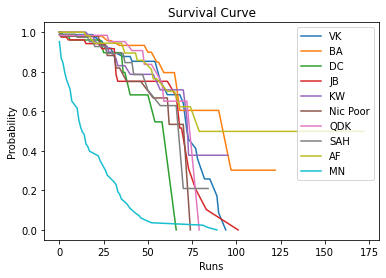

In [446]:
ax = plt.subplot(111)

kmf.fit(vk['Score'],event_observed = vk['Alive or dead'], label=['Virat Kohli'])
kmf.survival_function_.plot(ax=ax)
# # kmf.survival_function_
# # kmf.plot_survival_function()


kmf.fit(ba['Score'],event_observed = ba['Alive or dead'], label=['Babar Azam'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(dc['Score'],event_observed = dc['Alive or dead'], label=['Dinesh Chandimal'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

kmf.fit(jb['Score'],event_observed = jb['Alive or dead'], label=['Jos Buttler'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(kw['Score'],event_observed = kw['Alive or dead'], label=['Kane Williamson'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(nicp['Score'],event_observed = nicp['Alive or dead'], label=['Nicholas Pooran'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(qdk['Score'],event_observed = qdk['Alive or dead'], label=['Quinton de Kock'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(sah['Score'],event_observed = sah['Alive or dead'], label=['Shakib Al Hasan'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(af['R'],event_observed = af['Alive'], label=['Aaron Finch'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

kmf.fit(mn['Runs'],event_observed = mn['Alive'], label=['Mohammed Nabi'])
kmf.survival_function_.plot(ax=ax)
# # kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
# plt.legend(labels=['DC','NP'])
plt.legend(labels =['VK','BA','DC','JB','KW','Nic Poor','QDK','SAH','AF','MN'])
plt.title('Survival Curve')

kmf4 = plt.gcf()

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


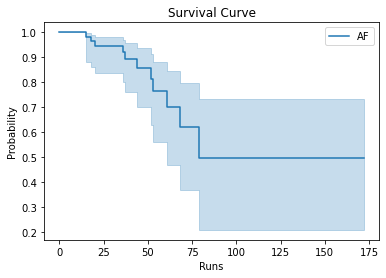

In [454]:
ax = plt.subplot(111)
# kmf = KaplanMeierFitter()
# kmf.fit(vk['Score'],event_observed = vk['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(ba['Score'],event_observed = ba['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()


# kmf = KaplanMeierFitter()
# kmf.fit(dc['Score'],event_observed = dc['Alive or dead'])
# kmf.survival_function_
# # kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(jb['Score'],event_observed = jb['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(kw['Score'],event_observed = kw['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(nicp['Score'],event_observed = nicp['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(qdk['Score'],event_observed = qdk['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

# kmf = KaplanMeierFitter()
# kmf.fit(sah['Score'],event_observed = sah['Alive or dead'])
# kmf.survival_function_
# kmf.plot_survival_function()

kmf = KaplanMeierFitter()
kmf.fit(af['R'],event_observed = af['Alive'])
kmf.survival_function_
kmf.plot_survival_function()


# kmf.fit(mn['Runs'],event_observed = mn['Alive'], label=['Mohammed Nabi'])
# kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['AF'])
plt.title('Survival Curve')

kmf4 = plt.gcf()

# Curve 3 - Batting 1st or 2nd

In [360]:
groupvk = vk.groupby('Start')
groupvk.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,venue,Date,match no.
Start,,,,,,,,,,,,,
1,28,28,19,5,0,147.36,1,bowled,0,v South Africa,Durban,9-Jan-11,T20I # 196
2,22,30,21,0,1,104.76,3,caught,0,v Australia,Sydney,1-Feb-12,T20I # 217


In [361]:
vk1 = groupvk.get_group('1')
vk2 = groupvk.get_group('2')

Batting 1st

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


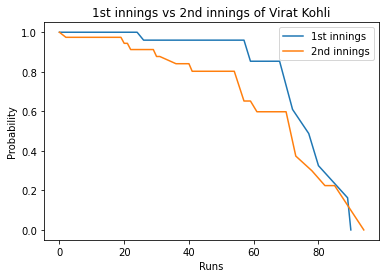

In [362]:
ax = plt.subplot(111)

kmf.fit(vk1['Score'],event_observed = vk1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(vk2['Score'],event_observed = vk2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Virat Kohli')

kmf2 = plt.gcf()

In [363]:
groupba = ba.groupby('Inn')
groupba.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Inn,,,,,,,,,,,,,
1,19,28,18,2,0,105.55,3,caught,0,v West Indies,Dubai (DSC),24-Sep-16,T20I # 569
2,15,13,11,2,0,136.36,3,not out,1,v England,Manchester,7-Sep-16,T20I # 566


In [364]:
ba1 = groupba.get_group('1')
ba2 = groupba.get_group('2')

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


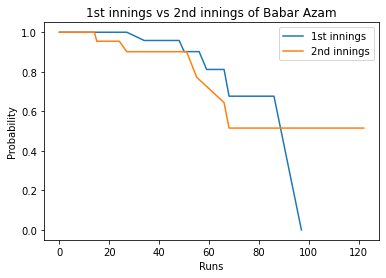

In [365]:
ax = plt.subplot(111)

kmf.fit(ba1['Score'],event_observed = ba1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(ba2['Score'],event_observed = ba2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Babar Azam')

kmf3 = plt.gcf()

In [366]:
groupdc = dc.groupby('Start')
groupdc.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1.0,29,26,23,1,1,126.08,4,caught,0.0,v New Zealand,Providence,30-Apr-10,T20I # 151
2.0,19,21,24,1,0,79.16,6,stumped,0.0,v Australia,Bridgetown,9-May-10,T20I # 170


In [367]:
dc1 = groupdc.get_group(1)
dc2 = groupdc.get_group(2)


C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


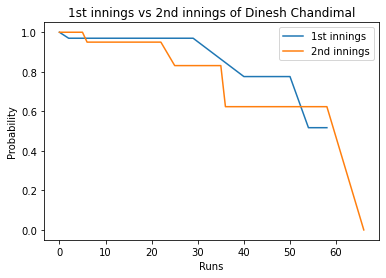

In [368]:
ax = plt.subplot(111)

kmf.fit(dc1['Score'],event_observed = dc1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(dc2['Score'],event_observed = dc2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Dinesh Chandimal')

kmf3 = plt.gcf()

In [369]:
groupjb = jb.groupby('Start')
groupjb.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1,7,11,8,1,0,87.5,7,bowled,0,v Pakistan,Dubai (DSC),25-Feb-12,T20I # 228
2,13,24,11,1,0,118.18,7,run out,0,v West Indies,The Oval,25-Sep-11,T20I # 208


In [370]:
jb1 = groupjb.get_group(1)
jb2 = groupjb.get_group(2)


C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


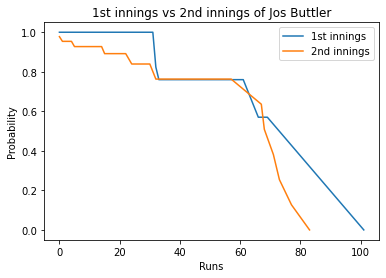

In [371]:
ax = plt.subplot(111)

kmf.fit(jb1['Score'],event_observed = jb1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(jb2['Score'],event_observed = jb2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Jos Buttler')

kmf3 = plt.gcf()

In [372]:
groupkw = kw.groupby('Start')
groupkw.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1.0,28,30,20,1,2,140,4,not out,1.0,v South Africa,Hamilton,19-Feb-12,T20I # 222
2.0,48,62,38,5,0,126.31,4,run out,0.0,v Zimbabwe,Auckland,11-Feb-12,T20I # 219


In [373]:
kw1 = groupkw.get_group(1)
kw2 = groupkw.get_group(2)



C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


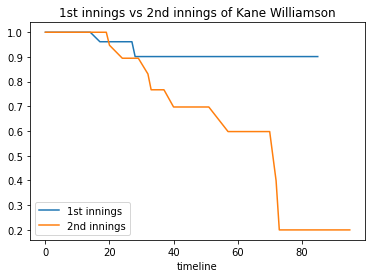

In [374]:
ax = plt.subplot(111)

kmf.fit(kw1['Score'],event_observed = kw1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(kw2['Score'],event_observed = kw2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Kane Williamson')

kmf3 = plt.gcf()

In [375]:
groupnicp = nicp.groupby('Start')
groupnicp.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1,5,4,4,1,0,125,6,caught,0,v Pakistan,Dubai (DSC),23-Sep-16,T20I # 568
2,4,7,6,1,0,66.66,8,caught,0,v Pakistan,Dubai (DSC),24-Sep-16,T20I # 569


In [376]:
nicp1 = groupnicp.get_group('1')
nicp2 = groupnicp.get_group('2')

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


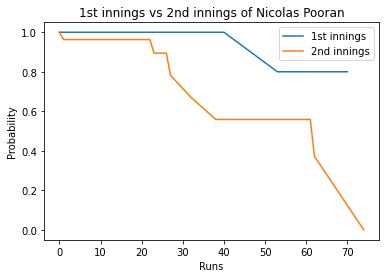

In [377]:
ax = plt.subplot(111)

kmf.fit(nicp1['Score'],event_observed = nicp1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(nicp2['Score'],event_observed = nicp2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Nicolas Pooran')

kmf3 = plt.gcf()

In [378]:
groupqdk = qdk.groupby('Start')
groupqdk.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1,0,1,0,0,0,-,7,not out,1,v New Zealand,East London,23-Dec-12,T20I # 295
2,28,23,23,5,0,121.73,4,not out,1,v New Zealand,Durban,21-Dec-12,T20I # 293


In [379]:
qdk1 = groupqdk.get_group('1')
qdk2 = groupqdk.get_group('2')


C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


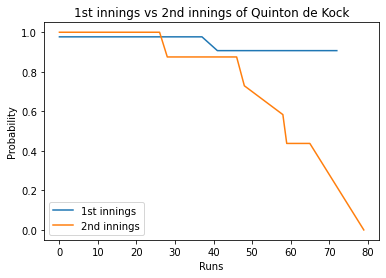

In [380]:
ax = plt.subplot(111)

kmf.fit(qdk1['Score'],event_observed = qdk1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(qdk2['Score'],event_observed = qdk2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Quinton de Kock')

kmf3 = plt.gcf()

In [381]:
groupsah = sah.groupby('Start')
groupsah.first()

,Score,Mins,BF,4s,6s`,Strike rate,Pos,mode of dissmasal,Alive or dead,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1,26,32,28,2,0,92.85,4,caught,0,v Zimbabwe,Khulna,28-Nov-06,T20I # 9
2,13,9,9,1,0,144.44,5,caught,0,v West Indies,Johannesburg,13-Sep-07,T20I # 24


In [382]:
sah1 = groupsah.get_group(1)
sah2 = groupsah.get_group(2)



C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


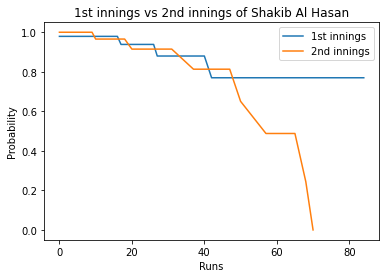

In [383]:
ax = plt.subplot(111)

kmf.fit(sah1['Score'],event_observed = sah1['Alive or dead'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(sah2['Score'],event_observed = sah2['Alive or dead'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Shakib Al Hasan')

kmf3 = plt.gcf()

In [384]:
groupaf = af.groupby('Start')
groupaf.first()

,R,mins,bf,4s,6s,Strike rate,p,Mode of dissmisal,Alive,Opposition,Venue,Date,Match no.
Start,,,,,,,,,,,,,
1,15,21,14,1,0,107.14,5,not out,1,v England,Adelaide,40555,T20I # 197
2,7,17,6,1,0,116.66,1,lbw,0,v Sri Lanka,Melbourne,41302,T20I # 300


In [385]:
af1 = groupaf.get_group(1)
af2 = groupaf.get_group(2)

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


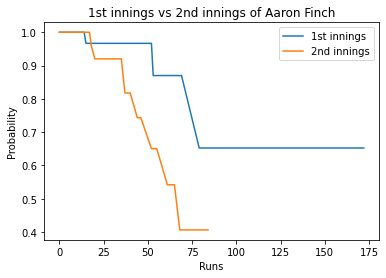

In [386]:
ax = plt.subplot(111)

kmf.fit(af1['R'],event_observed = af1['Alive'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(af2['R'],event_observed = af2['Alive'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Aaron Finch')

kmf3 = plt.gcf()

In [387]:
groupmn = mn.groupby('Inns')
groupmn.first()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Alive,Opposition,Ground,Start Date,Match no
Inns,,,,,,,,,,,,,
1,2,6,5,0,0,40,7,caught,0,v Ireland,Colombo (PSS),1-Feb-10,T20I # 128
2,23,15,12,3,0,191.66,6,caught,1,v Canada,Colombo (SSC),4-Feb-10,T20I # 132


In [388]:
mn1 = groupmn.get_group(1)
mn2 = groupmn.get_group(2)

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


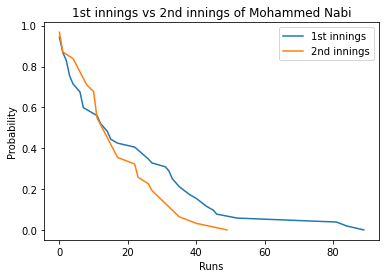

In [389]:
ax = plt.subplot(111)

kmf.fit(mn1['Runs'],event_observed = mn1['Alive'], label=['1st innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(mn2['Runs'],event_observed = mn2['Alive'], label=['2nd innings'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['1st innings','2nd innings'])
plt.title('1st innings vs 2nd innings of Mohammed Nabi')

kmf3 = plt.gcf()

# Batting at the beginning of career VS last 5 years

# Survival curve of batting position

In [390]:
vkposition = vk.groupby('Pos')
vkposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,venue,Date,match no.
Pos,,,,,,,,,,,,,
1,28,28,19,5,0,147.36,bowled,1,0,v South Africa,Durban,9-Jan-11,T20I # 196
2,70,67,41,10,1,170.73,caught,2,0,v New Zealand,Chennai,11-Sep-12,T20I # 261
3,14,15,12,2,0,116.66,caught,1,0,v West Indies,Port of Spain,4-Jun-11,T20I # 200
4,4,5,5,0,0,80,caught,1,0,v England,Manchester,31-Aug-11,T20I # 204
5,26,30,21,3,1,123.8,not out,None,1,v Zimbabwe,Harare,12-Jun-10,T20I # 182
6,0,1,2,0,0,0,caught,1,0,v Ireland,Dublin (Malahide),27-Jun-18,T20I # 678


In [391]:
vkp1 = vkposition.get_group('1')
vkp2 = vkposition.get_group('2')
vkp3 = vkposition.get_group('3')
vkp4 = vkposition.get_group('4')
vkp5 = vkposition.get_group('5')

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


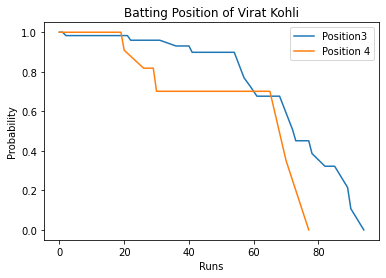

In [392]:
ax = plt.subplot(111)

kmf.fit(vkp3['Score'],event_observed = vkp3['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(vkp4['Score'],event_observed = vkp4['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position3','Position 4'])
plt.title('Batting Position of Virat Kohli')

kmf2 = plt.gcf()

In [393]:
baposition = ba.groupby('Pos')
baposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Inn,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
1,45,-,44,3,0,102.27,caught,1,0,v Australia,Dubai (DSC),26-Oct-18,T20I # 702
2,17,-,13,3,0,130.76,lbw,1,0,v West Indies,Karachi,1-Apr-18,T20I # 663
3,15,13,11,2,0,136.36,not out,2,1,v England,Manchester,7-Sep-16,T20I # 566
4,43,-,38,3,1,113.15,bowled,1,0,v West Indies,Port of Spain,1-Apr-17,T20I # 604
5,41,68,41,1,1,100,caught,1,0,v New Zealand,Wellington,22-Jan-18,T20I # 639


In [394]:
bap1 = baposition.get_group('1')
bap2 = baposition.get_group('2')
bap3 = baposition.get_group('3')
bap4 = baposition.get_group('4')
bap5 = baposition.get_group('5')

In [395]:
# bap 1 2 3 

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


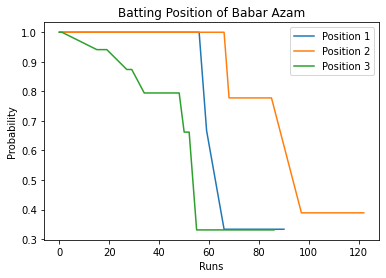

In [396]:
ax = plt.subplot(111)

kmf.fit(bap1['Score'],event_observed = bap1['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(bap2['Score'],event_observed = bap2['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

kmf.fit(bap3['Score'],event_observed = bap3['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 1','Position 2','Position 3'])
plt.title('Batting Position of Babar Azam')

kmf2 = plt.gcf()

In [397]:
dcposition = dc.groupby('Pos')
dcposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
1,50,55,39,7,1,128.2,caught,1.0,0.0,v U.A.E.,Mirpur,25-Feb-16,T20I # 510
2,66,94,54,5,2,122.22,not out,2.0,1.0,v South Africa,Colombo (RPS),10-Sep-21,T20I # 1265
3,2,-,3,0,0,66.66,lbw,2.0,0.0,v Australia,Perth,31-Oct-10,T20I # 192
4,29,26,23,1,1,126.08,caught,1.0,0.0,v New Zealand,Providence,30-Apr-10,T20I # 151
5,9,6,8,0,1,112.5,caught,1.0,0.0,v Zimbabwe,Providence,3-May-10,T20I # 157
6,19,21,24,1,0,79.16,stumped,2.0,0.0,v Australia,Bridgetown,9-May-10,T20I # 170
7,7,20,11,1,0,63.63,caught,2.0,0.0,v India,Pallekele,7-Aug-12,T20I # 255


In [398]:
dcp1 = dcposition.get_group('1')
dcp2 = dcposition.get_group('2')
dcp3 = dcposition.get_group('3')
dcp4 = dcposition.get_group('4')
dcp5 = dcposition.get_group('5')
dcp6 = dcposition.get_group('6')
dcp7 = dcposition.get_group('7')

In [399]:
# dcp3 
# dcp4

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


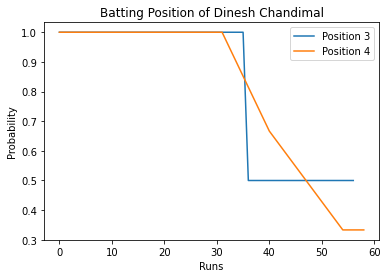

In [400]:
ax = plt.subplot(111)

kmf.fit(dcp3['Score'],event_observed = dcp3['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(dcp4['Score'],event_observed = dcp4['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 3','Position 4'])
plt.title('Batting Position of Dinesh Chandimal')

kmf2 = plt.gcf()

In [401]:
jbposition = jb.groupby('Pos')
jbposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
1,44,35,29,5,2,151.72,caught,1,0,v Australia,Southampton,4-Sep-20,T20I # 1095
2,73,-,49,3,4,148.97,not out,2,1,v Sri Lanka,Southampton,5-Jul-16,T20I # 561
4,3,14,8,0,0,37.5,caught,1,0,v West Indies,Bridgetown,13-Mar-14,T20I # 364
5,0,2,0,0,0,-,not out,2,1,v West Indies,Nottingham,24-Jun-12,T20I # 246
6,3,6,4,0,0,75,caught,2,0,v Pakistan,Dubai (DSC),23-Feb-12,T20I # 226
7,13,24,11,1,0,118.18,run out,2,0,v West Indies,The Oval,25-Sep-11,T20I # 208


In [402]:
jbp1 = jbposition.get_group('1')
jbp2 = jbposition.get_group('2')
jbp4 = jbposition.get_group('4')
jbp5 = jbposition.get_group('5')
jbp6 = jbposition.get_group('6')
jbp7 = jbposition.get_group('7')

In [403]:
# jbp2 
# jbp5
# jbp6

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


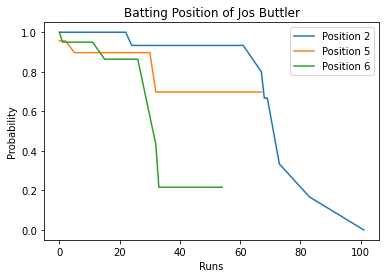

In [404]:
ax = plt.subplot(111)

kmf.fit(jbp2['Score'],event_observed = jbp2['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(jbp5['Score'],event_observed = jbp5['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

kmf.fit(jbp6['Score'],event_observed = jbp6['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()


plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 2','Position 5','Position 6'])
plt.title('Batting Position of Jos Buttler')

kmf2 = plt.gcf()

In [405]:
kwposition = kw.groupby('Pos')
kwposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
1,19,37,18,2,0,105.55,caught,2.0,0.0,v West Indies,Roseau,5-Jul-14,T20I # 402
2,15,33,13,2,0,115.38,run out,2.0,0.0,v Pakistan,Pallekele,23-Sep-12,T20I # 271
3,57,65,37,8,0,154.05,run out,2.0,0.0,v England,Manchester,23-Jun-15,T20I # 423
4,48,62,38,5,0,126.31,run out,2.0,0.0,v Zimbabwe,Auckland,11-Feb-12,T20I # 219
5,6,13,9,0,0,66.66,caught,2.0,0.0,v South Africa,Auckland,22-Feb-12,T20I # 223
7,20,7,5,3,1,400,not out,2.0,1.0,v Zimbabwe,Hamilton,14-Feb-12,T20I # 220
8,4,8,4,0,0,100,run out,1.0,0.0,v Sri Lanka,Pallekele,27-Sep-12,T20I # 275


In [406]:
kwp1 = kwposition.get_group('1')
kwp2 = kwposition.get_group('2')
kwp3 = kwposition.get_group('3')
kwp4 = kwposition.get_group('4')
kwp5 = kwposition.get_group('5')
# kwp6 = kwposition.get_group('6')
kwp7 = kwposition.get_group('7')

In [407]:
# kwp2
# kwp3


C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


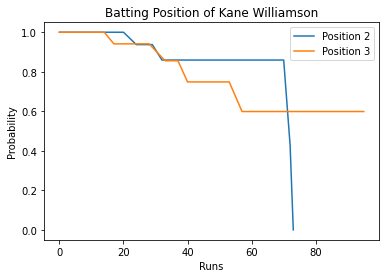

In [408]:
ax = plt.subplot(111)

kmf.fit(kwp2['Score'],event_observed = kwp2['Alive or dead'], label=['Position 2'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(kwp3['Score'],event_observed = kwp3['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 2','Position 3'])
plt.title('Batting Position of Kane Williamson')

kmf2 = plt.gcf()

In [409]:
nicpposition = nicp.groupby('Pos')
nicpposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
3,23,-,17,3,0,135.29,not out,2,1,v Bangladesh,Sylhet,17-Dec-18,T20I # 715
4,38,-,18,4,2,211.11,not out,2,1,v India,Thiruvananthapuram,8-Dec-19,T20I # 1022
5,4,2,3,1,0,133.33,bowled,2,0,v India,Lucknow,6-Nov-18,T20I # 709
6,5,4,4,1,0,125,caught,1,0,v Pakistan,Dubai (DSC),23-Sep-16,T20I # 568
7,20,-,14,0,2,142.85,caught,2,0,v South Africa,St George's,3-Jul-21,T20I # 1181
8,4,7,6,1,0,66.66,caught,2,0,v Pakistan,Dubai (DSC),24-Sep-16,T20I # 569


In [410]:
# kwp1 = kwposition.get_group('1')
# kwp2 = kwposition.get_group('2')
nicpp3 = nicpposition.get_group('3')
nicpp4 = nicpposition.get_group('4')
nicpp5 = nicpposition.get_group('5')
nicpp6 = nicpposition.get_group('6')
nicpp7 = nicpposition.get_group('7')
nicpp8 = nicpposition.get_group('8')

In [411]:
# nicpp3
# nicpp5


C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


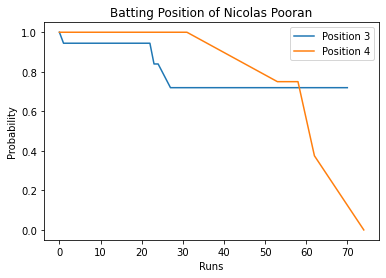

In [412]:
ax = plt.subplot(111)

kmf.fit(nicpp3['Score'],event_observed = nicpp3['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(nicpp5['Score'],event_observed = nicpp5['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 3','Position 4'])
plt.title('Batting Position of Nicolas Pooran')

kmf2 = plt.gcf()

In [413]:
qdkposition = qdk.groupby('Pos')
qdkposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
1,30,26,19,6,0,157.89,caught,1,0,v Pakistan,Dubai (DSC),15-Nov-13,T20I # 336
2,5,9,7,1,0,71.42,lbw,1,0,v Sri Lanka,Colombo (RPS),2-Aug-13,T20I # 323
3,2,12,4,0,0,50,caught,1,0,v New Zealand,Gqeberha,26-Dec-12,T20I # 297
4,28,23,23,5,0,121.73,not out,2,1,v New Zealand,Durban,21-Dec-12,T20I # 293
7,0,1,0,0,0,-,not out,1,1,v New Zealand,East London,23-Dec-12,T20I # 295


In [414]:
qdkp1 = qdkposition.get_group('1')
qdkp2 = qdkposition.get_group('2')
qdkp3 = qdkposition.get_group('3')
qdkp4 = qdkposition.get_group('4')
# nicpp5 = nicpposition.get_group('5')
# nicpp6 = nicpposition.get_group('6')
# nicpp7 = nicpposition.get_group('7')
# nicpp8 = nicpposition.get_group('8')



C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


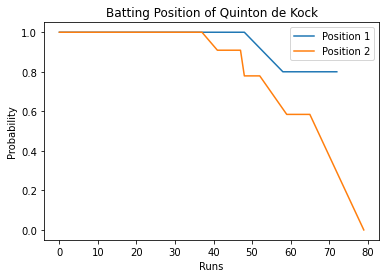

In [415]:
ax = plt.subplot(111)

kmf.fit(qdkp1['Score'],event_observed = qdkp1['Alive or dead'], label=['Position 1'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(qdkp2['Score'],event_observed = qdkp2['Alive or dead'], label=['Position 2'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 1','Position 2'])
plt.title('Batting Position of Quinton de Kock')

kmf2 = plt.gcf()

In [416]:
sahposition = sah.groupby('Pos')
sahposition.first()

,Score,Mins,BF,4s,6s`,Strike rate,mode of dissmasal,Start,Alive or dead,Opposition,Venue,Date,Match no.
Pos,,,,,,,,,,,,,
2,9,21,12,1,0,75,caught,2,0,v West Indies,Sharjah,29-Oct-21,T20I # 1375
3,57,33,33,9,0,172.72,bowled,1,0,v Ireland,Belfast,18-Jul-12,T20I # 249
4,26,32,28,2,0,92.85,caught,1,0,v Zimbabwe,Khulna,28-Nov-06,T20I # 9
5,13,9,9,1,0,144.44,caught,2,0,v West Indies,Johannesburg,13-Sep-07,T20I # 24
6,20,-,13,2,0,153.84,not out,2,1,v Zimbabwe,Khulna,15-Jan-16,T20I # 479
7,7,-,9,0,0,77.77,caught,2,0,v Sri Lanka,Colombo (RPS),16-Mar-18,T20I # 661


In [417]:
# sahp1 = sahposition.get_group('1')
sahp2 = sahposition.get_group('2')
sahp3 = sahposition.get_group('3')
sahp4 = sahposition.get_group('4')
sahp5 = sahposition.get_group('5')
sahp6 = sahposition.get_group('6')
sahp7 = sahposition.get_group('7')
# nicpp8 = nicpposition.get_group('8')

In [418]:
# sahp3
# sahp4

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


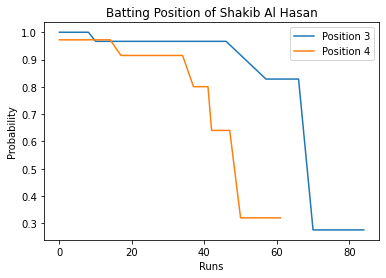

In [419]:
ax = plt.subplot(111)

kmf.fit(sahp3['Score'],event_observed = sahp3['Alive or dead'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(sahp4['Score'],event_observed = sahp4['Alive or dead'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 3','Position 4'])
plt.title('Batting Position of Shakib Al Hasan')

kmf2 = plt.gcf()

In [420]:
afposition = af.groupby('p')
afposition.first()

,R,mins,bf,4s,6s,Strike rate,Mode of dissmisal,Alive,Start,Opposition,Venue,Date,Match no.
p,,,,,,,,,,,,,
1,7,17,6,1,0,116.66,lbw,0,2,v Sri Lanka,Melbourne,41302,T20I # 300
2,36,33,23,6,0,156.52,run out,0,1,v India,Melbourne,40942,T20I # 218
3,0,2,1,0,0,0.00,lbw,0,2,v India,Visakhapatnam,43520,T20I # 748
5,15,21,14,1,0,107.14,not out,1,1,v England,Adelaide,40555,T20I # 197
6,53,35,33,4,2,160.60,not out,1,1,v England,Melbourne,40557,T20I # 198


In [421]:
afp1 = afposition.get_group(1)
afp2 = afposition.get_group(2)
afp3 = afposition.get_group(3)
afp5 = afposition.get_group(5)
afp6 = afposition.get_group(6)


In [422]:
# afp1
# afp2

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


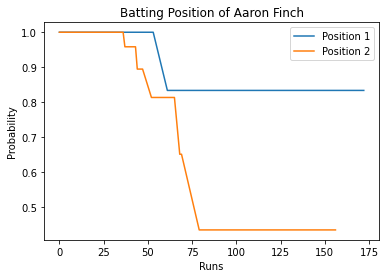

In [423]:
ax = plt.subplot(111)

kmf.fit(afp1['R'],event_observed = afp1['Alive'], label=['Position 3'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(afp2['R'],event_observed = afp2['Alive'], label=['Position 4'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 1','Position 2'])
plt.title('Batting Position of Aaron Finch')

kmf2 = plt.gcf()

In [424]:
mnposition = mn.groupby('Pos')
mnposition.first()

,Runs,Mins,BF,4s,6s,SR,Dismissal,Inns,Alive,Opposition,Ground,Start Date,Match no
Pos,,,,,,,,,,,,,
3,17,16,11,2,0,154.54,bowled,2,1,v Hong Kong,Nagpur,10-Mar-16,T20I # 528
4,1,4,3,0,0,33.33,caught,1,1,v Netherlands,Dubai (DSC),12-Feb-10,T20I # 141
5,22,-,13,3,0,169.23,caught,2,1,v Netherlands,Dubai (DSC),14-Mar-12,T20I # 233
6,23,15,12,3,0,191.66,caught,2,1,v Canada,Colombo (SSC),4-Feb-10,T20I # 132
7,2,6,5,0,0,40,caught,1,0,v Ireland,Colombo (PSS),1-Feb-10,T20I # 128


In [425]:
mnp3 = mnposition.get_group('4')
mnp4 = mnposition.get_group('4')
mnp5 = mnposition.get_group('5')
mnp6 = mnposition.get_group('6')
mnp7 = mnposition.get_group('7')

In [426]:
# mnp5
# mnp6

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


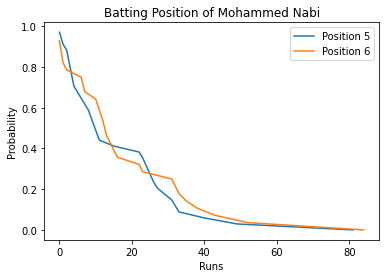

In [427]:
ax = plt.subplot(111)

kmf.fit(mnp5['Runs'],event_observed = mnp5['Alive'], label=['Position 5'])
kmf.survival_function_.plot(ax=ax)
# kmf.survival_function_
# kmf.plot_survival_function()

kmf.fit(mnp6['Runs'],event_observed = mnp6['Alive'], label=['Position 6'])
kmf.survival_function_.plot(ax=ax)
# kmf.plot_survival_function()

plt.xlabel("Runs")
plt.ylabel("Probability")
plt.legend(labels =['Position 5','Position 6'])
plt.title('Batting Position of Mohammed Nabi')

kmf2 = plt.gcf()

# Nelson Aalen Estimate 

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Probability')

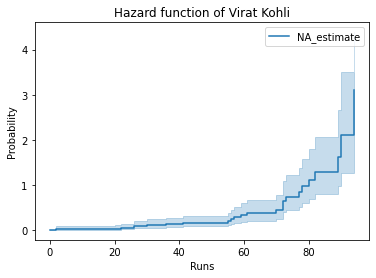

In [428]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(vk['Score'],event_observed = vk['Alive or dead'])
naf.cumulative_hazard_


plt.title('Hazard function of Virat Kohli')
plt.legend(labels =['VK'])

naf.plot_cumulative_hazard()

plt.xlabel("Runs")
plt.ylabel("Probability")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

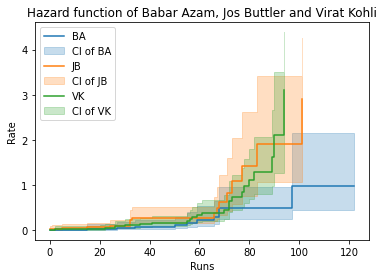

In [429]:
naf.fit(ba['Score'],event_observed = ba['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
naf.fit(jb['Score'],event_observed = jb['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
naf.fit(vk['Score'],event_observed = vk['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Babar Azam, Jos Buttler and Virat Kohli')
plt.legend(labels =['BA','CI of BA','JB','CI of JB','VK','CI of VK'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

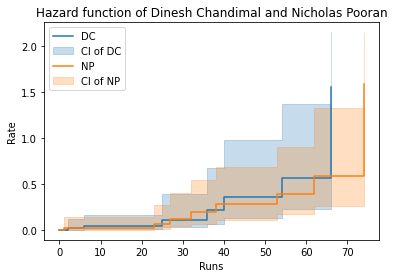

In [430]:
naf.fit(dc['Score'],event_observed = dc['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
naf.fit(nicp['Score'],event_observed = nicp['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Dinesh Chandimal and Nicholas Pooran')
plt.legend(labels =['DC','CI of DC','NP','CI of NP'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

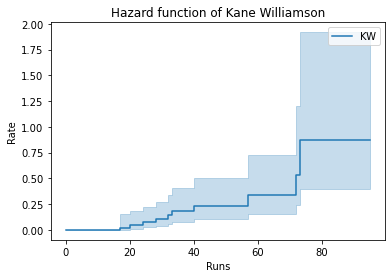

In [431]:
naf.fit(kw['Score'],event_observed = kw['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Kane Williamson')
plt.legend(labels =['KW'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

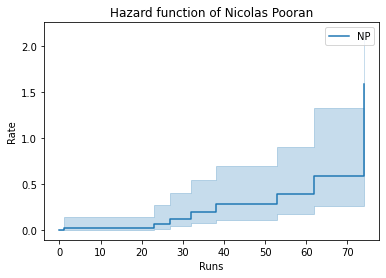

In [432]:
naf.fit(nicp['Score'],event_observed = nicp['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Nicolas Pooran')
plt.legend(labels =['NP'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

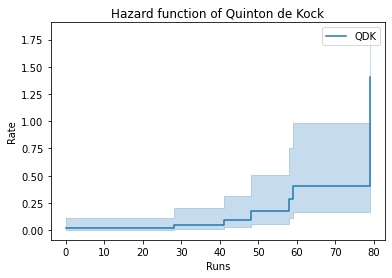

In [433]:
naf.fit(qdk['Score'],event_observed = qdk['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Quinton de Kock')
plt.legend(labels =['QDK'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

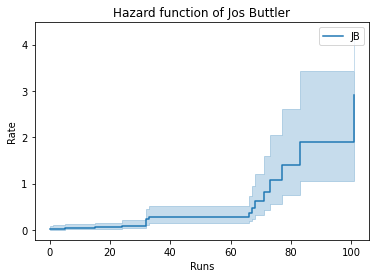

In [434]:
naf.fit(jb['Score'],event_observed = jb['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Jos Buttler')
plt.legend(labels =['JB'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

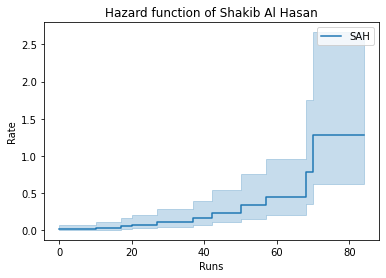

In [435]:
naf.fit(sah['Score'],event_observed = sah['Alive or dead'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Shakib Al Hasan')
plt.legend(labels =['SAH'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

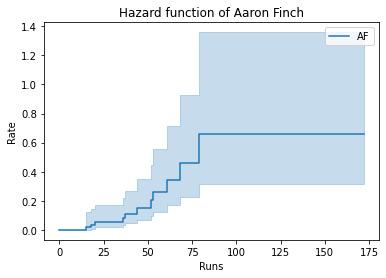

In [436]:
naf.fit(af['R'],event_observed = af['Alive'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Aaron Finch')
plt.legend(labels =['AF'])
plt.xlabel("Runs")
plt.ylabel("Rate")

C:\Users\levas\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Rate')

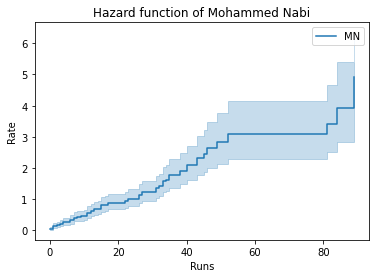

In [437]:
naf.fit(mn['Runs'],event_observed = mn['Alive'])
naf.cumulative_hazard_
naf.plot_cumulative_hazard()
plt.title('Hazard function of Mohammed Nabi')
plt.legend(labels =['MN'])
plt.xlabel("Runs")
plt.ylabel("Rate")

# Parametric 


In [438]:
from lifelines.statistics import logrank_test

In [439]:
T = sah1 ['Score'].astype(float)
E = sah1 ['Alive or dead'].astype(float)
T1 = sah2['Score'].astype(float)
E1 = sah2['Alive or dead'].astype(float)

In [440]:
results = logrank_test(T,T1,event_observed_A=E, event_observed_b=E1)
results.print_summary()

C:\Users\levas\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
  event_observed_b = 1     0.0
4     0.0
6     0.0
7     0.0
8     0.0
12    0.0
13    0.0
14    0.0
15    0.0
18    0.0
19    0.0
20    0.0
22    0.0
24    0.0
26    0.0
28    1.0
29    1.0
31    0.0
33    0.0
35    1.0
36    0.0
37    0.0
38    1.0
40    0.0
41    0.0
42    0.0
45    0.0
50    1.0
52    0.0
53    0.0
55    0.0
56    0.0
59    0.0
60    0.0
61    0.0
63    0.0
65    0.0
71    0.0
72    0.0
73    0.0
75    1.0
77    0.0
78    0.0
80    0.0
84    0.0
86    0.0
87    0.0
88    0.0
93    0.0
97    1.0
Name: Alive or dead, dtype: float64
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          44.38 <0.005     35.11

In [441]:
T = vkp3 ['Score'].astype(float)
E = vkp3 ['Alive or dead'].astype(float)
T1 = vkp4['Score'].astype(float)
E1 = vkp4['Alive or dead'].astype(float)

In [442]:
results = logrank_test(T,T1,event_observed_A=E, event_observed_b=E1)
results.print_summary()

C:\Users\levas\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
  event_observed_b = 4     0.0
20    0.0
52    1.0
53    0.0
55    0.0
56    0.0
59    1.0
60    0.0
61    0.0
62    0.0
73    0.0
74    1.0
76    1.0
80    0.0
87    1.0
88    0.0
91    0.0
Name: Alive or dead, dtype: float64
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          37.16 <0.005     29.77

In [443]:
T = mnp5 ['Runs'].astype(float)
E = mnp5['Alive'].astype(float)
T1 = mnp6['Runs'].astype(float)
E1 = mnp6['Alive'].astype(float)

In [444]:
results = logrank_test(T,T1,event_observed_A=E, event_observed_b=E1)
results.print_summary()

C:\Users\levas\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
  event_observed_b = 1     1.0
2     1.0
3     1.0
6     1.0
9     1.0
12    1.0
13    1.0
16    1.0
17    1.0
24    1.0
27    1.0
28    1.0
34    1.0
37    1.0
40    1.0
43    1.0
46    1.0
55    1.0
64    1.0
68    1.0
69    1.0
72    1.0
83    1.0
84    1.0
85    1.0
86    1.0
88    1.0
90    1.0
Name: Alive, dtype: float64
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.35 0.55      0.85